## SGD setup for a MKVSDE with polynomial drift

Consider a McKean-Vlasov (MKV) SDE of the following form:

\begin{equation}
\textrm{d}X_t = \bigl(\beta X_t + \mathbb{E}[X_t] - X_t \mathbb{E}[X^2_t] \bigr) \textrm{d} t + X_t \, \textrm{d} W_t, \quad X_0 = x_0.
\end{equation}

- Method 2: 
    
    We approximate the solution $X_t, t \in [0,T]$ by using a polynomial approximation for the function $\mathbb{E}[X_t]$ and $\mathbb{E}[X^2_t)].$ In particular we use $\widehat{\gamma}_{1,k}, k=1,\ldots,K,$ as the value of $\mathbb{E}[X_t]$ for $t \in \{t_1, \ldots, t_K\},$ and $\widehat{\gamma}_{2,k}, k=1,\ldots,K,$ as the value of $\mathbb{E}[X^2_t]$ for $t \in \{t_1, \ldots, t_K\},$ where the values $\{t_1, \ldots, t_K\},$ are either Chebychev or Lagrange nodes in the time interval $[0, T].$ The process with polynomial function approximation is generated as:
    
    \begin{equation}
    \textrm{d}Z_t = \bigl(\beta Z_t + \sum^{K}_{k=1} \widehat{\gamma}_{1,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  -  Z_t \sum^{K}_{k=1} \widehat{\gamma}_{2,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}  \bigr) \textrm{d} t + Z_t \, \textrm{d} W_t, \quad Z_0 = x_0.
    \end{equation}
    
    The gradient processes $\xi^k_{1,t}:= \partial_{\widehat{\gamma}_{1,k}}Z_t$ and $\xi^k_{2,t}:= \partial_{\widehat{\gamma}_{2,k}}Z_t$ for $k = 1, \ldots, K,$ are given as 
    
    \begin{align}
    \textrm{d}\xi^k_{1,t} &= \bigl(\beta \xi^k_{1,t} + \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}-\xi^k_{1,t} \sum^{K}_{k=1} \widehat{\gamma}_{2,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}\bigr) \textrm{d} t + \xi^k_{1,t}\, \textrm{d} W_t, \quad \xi^k_{1,0} = 0,\\
    \textrm{d}\xi^k_{2,t} &= \bigl(\beta \xi^k_{2,t} -\xi^k_{2,t} \sum^{K}_{k=1} \widehat{\gamma}_{2,k} \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j} - Z_t \prod_{\substack{ 1\leq j \leq K \\ k\neq j}} \frac{t-t_j}{t_k - t_j}\bigr) \textrm{d} t  + \xi^k_{2,t}\, \textrm{d} W_t, \quad \xi^k_{2,0} = 0.
    \end{align}
    
    We disretise the time interval $[0, T]$ uniformly into $M + 1$ steps, and insert Chebychev nodes to create a final time grid with $M+K$ intermediate points to generate discretised path of $Z$ and gradient processes. Our aim is to find the fixed-point of the map $\widehat{\Psi}^{(M+K)}$ defined as
    \begin{equation}
      \widehat{\Psi}^{(M+K)}(\widehat{\gamma}):= \mathcal{P}\Bigl(\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)\Bigr).
    \end{equation}
    
    In the linear MKV-SDE considered here, we have $\Psi\bigl(\mathcal{L}(\widehat{\gamma})\bigr)(t) = \bigl(\mathbb{E}[Z_t], \mathbb{E}[Z^2_t]\bigr).$ We compute the fixed-point by solving the following: 
    \begin{equation}
   \min_{\widehat{\gamma}} \big| \widehat{\gamma} - \widehat{\Psi}^{(M+K)}(\widehat{\gamma})\big|^2.
    \end{equation}
    
    To perform the numerical step, we vectorize $\widehat{\gamma}$ and $\widehat{\Psi}^{(M+K)}(\widehat{\gamma})$ by concatenating the rows to create a vector. Thus $\widehat{\gamma} = (\widehat{\gamma}_{1,1}, \ldots, \widehat{\gamma}_{1,K}, \widehat{\gamma}_{2,1}, \ldots, \widehat{\gamma}_{2,K}).$
    
    \begin{equation}
    F_i(\widehat{\gamma}, W) = Z_{t_i} - \widehat{\gamma}_{1,i}, i=1, \ldots, K, \quad \text{and,} \quad F_i(\widehat{\gamma}, W) = Z^2_{t_{i-K}} - \widehat{\gamma}_{2,{i-K}}, i=K+1, \ldots, 2K.
    \end{equation}
    
    The Jacobian matrix is then given as 
    \begin{equation}
        J_{\widehat{\gamma}}F = \begin{bmatrix}
                                \nabla^\top F_1(\widehat{\gamma}, W) \\
                                \vdots\\
                                \nabla^\top F_{2K}(\widehat{\gamma}, W)
                                \end{bmatrix}
                                = \begin{bmatrix}
                                    \frac{\partial F_1}{\partial \widehat{\gamma}_{1,1}} \ldots \frac{\partial F_1}{\partial \widehat{\gamma}_{2,K}}\\
                                    \vdots \ddots \vdots \\
                                    \frac{\partial F_{2K}}{\partial \widehat{\gamma}_{1,1}} \ldots \frac{\partial F_{2K}}{\partial \widehat{\gamma}_{2,K}}\\
                                    \end{bmatrix}
                               = \begin{bmatrix}
                                   \xi^1_{1,t_1} - 1 & \xi^2_{1,t_1} & \ldots & \xi^{K}_{2,t_1}\\
                                   \xi^1_{1,t_2} & \xi^2_{1,t_2} - 1 & \ldots & \xi^K_{2,t_2}\\
                                    \vdots & \vdots & \ldots & \vdots \\
                                   2 Z_{t_K} \xi^1_{1,t_K} & 2 Z_{t_K} \xi^2_{1,t_K} & \ldots & 2 Z_{t_K}  \xi^K_{2,t_K} - 1
                               \end{bmatrix}.
    \end{equation}

To the loss function, one can also add a constraint $\gamma_2 = \mathbb{E}[Z^2_t] \geq (\mathbb{E}[Z])^2 = (\gamma_1)^2$ to ensure that $\gamma_2$ remains positive and there is some relation between the two quantities. Thus, our loss function is given as 
\begin{equation}
\min_{\widehat{\gamma}} \big| \widehat{\gamma} - \widehat{\Psi}^{(M+K)}(\widehat{\gamma})\big|^2 + \lambda_{pen}\sum^K_{k=1}\bigl((\widehat{\gamma}_{1,k})^2 - \widehat{\gamma}_{2,k}\bigr).
\end{equation}
 
When differentiating the above penalization function w.r.t. $\gamma_{1,k}$, we get a term of 
\begin{equation}
\lambda_{pen} \times 2 \times \gamma_{1,k},
\end{equation}
and when differentiating the above penalization function w.r.t. $\gamma_{2,k}$, we get a term of 
\begin{equation}
- \lambda_{pen}.
\end{equation}
Thus, the update step of SGD algorithm needs to be modified to reflect the constraint. 

#### *Things to be added*

- include anti-thetic variates
- include adaptive learning rate
- clipping the gradient based if its norm exceeds a bound
- increase $T$ somewhere to be $100$
- use a weighted $L2$-norm for minimisation: scale each squared Euclidean difference with a weight of the type $\mathrm{e}^{-\alpha t_k}$
- include a constraint on $\gamma_2 > (\gamma_1)^2$ (*try last*)

### Implementation of method with approximation using Chebychev nodes

#### *Import relevant libraries*

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import random
import time
import math
import numpy
from numpy import pi
import matplotlib.pyplot as plt

from matplotlib import rc # for TeX in plot labels

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

#### *Import plot libraries*

In [2]:
from res.plot_lib import plot_data, plot_model, set_default
set_default()

#### *Chebyvchev nodes*

In [3]:
def CC_nodes(a, b, n):
    i = numpy.array(range(n))
    x = numpy.cos((2 * i + 1) * pi /(2 * n))
    z = 0.5 * (b-a) * x + 0.5 * (b + a)
    return numpy.flip(z, 0)

#### *Parameters*

In [4]:
M = 100  # number of discretisation steps
K = 5  # number of Chebychev nodes
x0 = 1
beta = 0.5
T = 1.0
dt = T / M
max_iter = 5 * 10 ** 4
max_batch_iter = 10 ** 4
BATCH_SIZE = 100

#### *Compute time grid and factors in polynomial approximation*

In [5]:
tspace = numpy.linspace(0, T, M + 1, dtype=float) # discretisation points
tnodes = CC_nodes(0, T, K) # Chebychev nodes

# insert unique Chebychev nodes in the time grid based on M values
tspace = numpy.unique(numpy.concatenate((tspace, tnodes), axis=0))
tgrid_values = len(tspace)

# identify the indices of Chebychev nodes in the time grid
tnodes_idx = numpy.zeros(K, dtype=int)
ctr = 0
for j in range(tgrid_values):
    if ctr < K: 
        if tnodes[ctr] == tspace[j]:
            tnodes_idx[ctr] = j
            ctr +=1 

# tgrid_values product values for K different Chebychev nodes
tspace_fact = numpy.ones((tgrid_values, K)) 
tnode_prod = numpy.zeros(K) # for computing the denominator in the factor

# compute products in the denominator of polynomial approxmiation factor
for k in range(K):
    temp_prod = tnodes[k] - numpy.delete(tnodes, k)
    tnode_prod[k] = numpy.prod(temp_prod)

# compute time factors in the polynomial approxmiation
for i in range(tgrid_values):
    for k in range(K):
        temp_prod = tspace[i] - numpy.delete(tnodes, k)
        tspace_fact[i][k] =  numpy.prod(temp_prod) / tnode_prod[k]

#### *Define MKV SDE class*

In [6]:
class MKVSDEpoly_approx():
    """
    An MKVSDE class with 3 types of paths:
        1. Underlying MKV path for computing the loss function with BM 1
        2. An independent MKV path for computing the jacobian with BM 2
        3. Gradient process paths driven by BM 2
    """
    
    def __init__(self, tgrid_values, K):
        super().__init__()
        self.path = numpy.zeros(tgrid_values)
        self.path_grad = numpy.zeros(tgrid_values) # sample path to be used for gradient process
        self.grad = numpy.zeros((2, K, tgrid_values)) # gradient processes
    
    def generatepath(self, x0, gamma, beta, tgrid_values, tspace, dW):
        self.path[0] = x0
        self.path_grad[0] = x0
        for i in range(tgrid_values-1):
            dt = tspace[i+1] - tspace[i]
            
            self.path[i+1] = self.path[i]  +  beta * self.path[i] * dt \
            + numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - self.path[i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + self.path[i] * dt ** 0.5 * dW[0][i]
            
            self.path_grad[i+1] = self.path_grad[i]  +  beta * self.path_grad[i] * dt \
            + numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - self.path_grad[i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + self.path_grad[i] * dt ** 0.5 * dW[1][i]
            
            self.grad[0,:,i+1] = self.grad[0,:,i]  + beta * self.grad[0,:,i] * dt \
                + tspace_fact[i] * dt \
                - self.grad[0,:,i] * numpy.dot(gamma[0], tspace_fact[i]) * dt \
                + self.grad[0,:,i] * dt ** 0.5 * dW[1][i]
            
            self.grad[1,:,i+1] = self.grad[1,:,i] + beta * self.grad[1,:,i] * dt \
                - self.path_grad[i] * tspace_fact[i] * dt \
                - self.grad[1,:,i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
                + self.grad[1,:,i] * dt ** 0.5 * dW[1][i]
                
class MKVSDEpolybatch_approx():
    """
    An MKVSDE class that has a batch of size BATCH_SIZE with 3 types of paths:
        1. Underlying MKV path for computing the loss function with BM 1
        2. An independent MKV path for computing the jacobian with BM 2
        3. Gradient process paths driven by BM 2
    """
    
    def __init__(self, tgrid_values, K, BATCH_SIZE):
        super().__init__()
        self.path = numpy.zeros((BATCH_SIZE, tgrid_values))
        self.path_grad = numpy.zeros((BATCH_SIZE, tgrid_values)) # sample path to be used for gradient process
        self.grad = numpy.zeros((2, K, BATCH_SIZE, tgrid_values)) # gradient processes
    
    def generatebatch(self, x0, gamma, beta, tgrid_values, K, BATCH_SIZE, tspace, dW):
        self.path[:,0] = x0
        self.path_grad[:,0] = x0
        for i in range(tgrid_values-1):
            dt = tspace[i+1] - tspace[i]
            
            self.path[:,i+1] = self.path[:,i]  +  beta * self.path[:,i] * dt \
            + numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - self.path[:,i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + self.path[:,i] * dt ** 0.5 * dW[0,:,i]
            
            self.path_grad[:,i+1] = self.path_grad[:,i]  +  beta * self.path_grad[:,i] * dt \
            + numpy.dot(gamma[0], tspace_fact[i]) * dt \
            - self.path_grad[:,i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
            + self.path_grad[:,i] * dt ** 0.5 * dW[1,:,i]
            
            self.grad[0,:,:,i+1] = self.grad[0,:,:,i]  + beta * self.grad[0,:,:,i] * dt \
                + numpy.transpose(numpy.tile(tspace_fact[i],(BATCH_SIZE,1))) * dt \
                - self.grad[0,:,:,i] * numpy.dot(gamma[0],tspace_fact[i]) * dt \
                + self.grad[0,:,:,i] * numpy.tile(dW[1,:,i],(K,1)) * dt ** 0.5 
            
            self.grad[1,:,:,i+1] = self.grad[1,:,:,i] + beta * self.grad[1,:,:,i] * dt \
                - numpy.outer(tspace_fact[i],self.path_grad[:,i]) * dt \
                - self.grad[1,:,:,i] * numpy.dot(gamma[1], tspace_fact[i]) * dt \
                + self.grad[1,:,:,i] * numpy.tile(dW[1,:,i],(K,1)) * dt ** 0.5 

#### *Compute Jacobian*

In [7]:
def poly_jacobian(X, nodes_idx, n_nodes):
    """
    Parameters
    ----------
    X : an instance of MKVSDEpoly_approx
    nodes_idx : indices corresponding to Chebychev nodes
    n_nodes: number of Chebychev nodes
    
    Returns
    -------
    Jacobian matrix corresponding to polynomial drift model
    """
    # matrix of basis function at independent path values
    jacob1 = numpy.concatenate([numpy.ones(n_nodes), \
                                X.path_grad[tnodes_idx]])
    jacob1 = numpy.transpose(numpy.tile(jacob1, (2*n_nodes,1))) 
    
    # final matrix of gradient values -- This part needs to be generalised and optimised
    jacob2_1 = X.grad[0][0][nodes_idx]
    jacob2_2 = X.grad[1][0][nodes_idx]
    for i in range(n_nodes-1):
        jacob2_1 = numpy.vstack([jacob2_1, X.grad[0][i+1][nodes_idx]])
        jacob2_2 = numpy.vstack([jacob2_2, X.grad[1][i+1][nodes_idx]])
    jacob2_1 = numpy.transpose(jacob2_1)    
    jacob2_2 = numpy.transpose(jacob2_2)
    jacob2_1 = numpy.vstack([jacob2_1, jacob2_1])
    jacob2_2 = numpy.vstack([jacob2_2, jacob2_2])
    jacob2 = numpy.hstack([jacob2_1, jacob2_2])
    
    # element wise product
    jacobian = jacob1 * jacob2 
    jacobian = jacobian - numpy.eye(2*n_nodes)
    
    return jacobian

def poly_batch_jacobian(X, nodes_idx, n_nodes, BATCH_SIZE):
    """
    Parameters
    ----------
    X : an instance of MKVSDEpolybatch_approx
    nodes_idx : indices corresponding to Chebychev nodes
    n_nodes: number of Chebychev nodes
    BATCH_SIZE: mini-batch size
    
    Returns
    -------
    Jacobian matrix corresponding to polynomial drift model using mini-batch
    """
    jacobian_final = numpy.zeros((2*n_nodes,2*n_nodes))
    for batch_idx in range(BATCH_SIZE):
        # matrix of basis function at independent path values
        jacob1 = numpy.concatenate([numpy.ones(n_nodes), \
                                    X.path_grad[batch_idx, tnodes_idx]])
        jacob1 = numpy.transpose(numpy.tile(jacob1, (2*n_nodes,1))) 

        # final matrix of gradient values -- This part needs to be generalised and optimised
        jacob2_1 = X.grad[0,0,batch_idx,nodes_idx]
        jacob2_2 = X.grad[0,0,batch_idx,nodes_idx]
        for i in range(n_nodes-1):
            jacob2_1 = numpy.vstack([jacob2_1, X.grad[0][i+1][batch_idx][nodes_idx]])
            jacob2_2 = numpy.vstack([jacob2_2, X.grad[1][i+1][batch_idx][nodes_idx]])
        jacob2_1 = numpy.transpose(jacob2_1)    
        jacob2_2 = numpy.transpose(jacob2_2)
        jacob2_1 = numpy.vstack([jacob2_1, jacob2_1])
        jacob2_2 = numpy.vstack([jacob2_2, jacob2_2])
        jacob2 = numpy.hstack([jacob2_1, jacob2_2])

        # element wise product
        jacobian = jacob1 * jacob2 
        jacobian = jacobian - numpy.eye(2*n_nodes)
        jacobian_final = jacobian_final + jacobian
        
    return jacobian_final / BATCH_SIZE

#### *SGD*

In [ ]:
# seed initialise
random.seed(1881)

lr = 0.01 # learning rate
l2pen = 0  # l2 penalization parameter
lpen = 0 # parameter for constraint between gamma_1 and gamma_2
error_tol = 10 ** -5 # error tolerance
error = 1000 # not used inside SGD 
gamma = x0 * numpy.ones((2,K))
gamma_SGD = numpy.ones((2,K)) # store final values
Z = MKVSDEpoly_approx(tgrid_values, K)
gamma_aver = numpy.zeros((2,K))
dW = numpy.random.randn(max_iter,2,tgrid_values-1)
jacobian = numpy.zeros((2*K,2*K))

start_time = time.time()
ctr = 0 # iteration counter
while ctr < max_iter and error > error_tol:
    Z.generatepath(x0, gamma, beta, tgrid_values, tspace, dW[ctr])
    loss_grad = 2 * (numpy.concatenate([Z.path[tnodes_idx], Z.path[tnodes_idx] ** 2]) \
                     - numpy.concatenate([gamma[0], gamma[1]]))
    
    jacobian = poly_jacobian(Z, tnodes_idx, K)
    gamma_prev = gamma
    gamma_prev_SGD = numpy.concatenate([gamma_prev[0], gamma_prev[1]])
    gamma_prev_SGD_pen = numpy.concatenate([2 * gamma_prev[0], -1.0 * numpy.ones(K)])
    gamma_SGD = gamma_prev_SGD * (1 - l2pen) - lr * numpy.matmul(loss_grad, jacobian)\
                + lpen * gamma_prev_SGD_pen
    
    gamma = numpy.array([gamma_SGD[0:K],gamma_SGD[K:2*K]])
    gamma_aver += gamma

    if (ctr + 1) % 1000 == 0:
        print('Iteration: [{}/{}] '.format(ctr, max_iter))
        lpen = lpen / 1.1
    ctr += 1

gamma_SGD = gamma_aver / max_iter

SGD_run_time = float(time.time() - start_time)

print("---Run time for SGD algo: %f seconds ---" % SGD_run_time)

#### *Compute gradient of loss function with mini-batch*

In [8]:
def batch_gradloss(X, gamma, BATCH_SIZE, nodes_idx):
    return 2 * numpy.mean((numpy.concatenate([X.path[:, nodes_idx], X.path[:, nodes_idx] ** 2], axis=1) \
                     - numpy.concatenate([gamma[0], gamma[1]])), 0)

#### *SGD with mini-batch*

In [9]:
# seed initialise
random.seed(1881)

lr = 0.01 # learning rate
error_tol = 10 ** -5 # error tolerance
error = 1000 # not used inside SGD 
gamma = x0 * numpy.ones((2,K))
gamma_batchSGD = numpy.ones((2,K)) # store final values
Z = MKVSDEpolybatch_approx(tgrid_values, K, BATCH_SIZE)
gamma_batchaver = numpy.zeros((2,K))
dW = numpy.random.randn(max_batch_iter, 2, BATCH_SIZE, tgrid_values-1)
jacobian = numpy.zeros((2*K,2*K))

start_time = time.time()
ctr = 0 # iteration counter
while ctr < max_batch_iter and error > error_tol:
    Z.generatebatch(x0, gamma, beta, tgrid_values, K, BATCH_SIZE, tspace, dW[ctr])
    loss_grad = batch_gradloss(Z, gamma, BATCH_SIZE, tnodes_idx)
    jacobian = poly_batch_jacobian(Z, tnodes_idx, K, BATCH_SIZE)
    
    gamma_prev = gamma
    gamma_prev_SGD = numpy.concatenate([gamma_prev[0], gamma_prev[1]])
    gamma_SGD = gamma_prev_SGD - lr * numpy.matmul(loss_grad, jacobian)
    
    gamma = numpy.array([gamma_SGD[0:K],gamma_SGD[K:2*K]])
    gamma_batchaver += gamma

    if (ctr + 1) % 500 == 0:
        print('Iteration: [{}/{}] '.format(ctr, max_batch_iter))
    ctr += 1

gamma_batchSGD = gamma_batchaver / max_batch_iter

batchSGD_run_time = float(time.time() - start_time)

print("---Run time for mini-batch SGD algo: %f seconds ---" % batchSGD_run_time)

Iteration: [499/10000] 
Iteration: [999/10000] 
Iteration: [1499/10000] 
Iteration: [1999/10000] 
Iteration: [2499/10000] 
Iteration: [2999/10000] 
Iteration: [3499/10000] 
Iteration: [3999/10000] 
Iteration: [4499/10000] 
Iteration: [4999/10000] 
Iteration: [5499/10000] 
Iteration: [5999/10000] 
Iteration: [6499/10000] 
Iteration: [6999/10000] 
Iteration: [7499/10000] 
Iteration: [7999/10000] 
Iteration: [8499/10000] 
Iteration: [8999/10000] 
Iteration: [9499/10000] 
Iteration: [9999/10000] 
---Run time for mini-batch SGD algo: 176.638395 seconds ---


#### *Monte Carlo benchmark and polynomial function approximation*

In [10]:
N = 5 * 10 ** 6
ZMC1 = numpy.zeros(N)
ZMC1 = x0 # starting value
gamma_MC = numpy.zeros((2,tgrid_values))
gamma_MC[0, 0] = numpy.mean(ZMC1)
gamma_MC[1, 0] = numpy.mean(ZMC1 **2)
ZMC2 = numpy.zeros(N)

start_time = time.time()
for i in range(tgrid_values-1):
    dW = numpy.random.randn(N)
    dt = tspace[i+1] - tspace[i]
    ZMC2 = ZMC1  + beta * ZMC1 * dt + gamma_MC[0, i] * dt \
    - ZMC1 * gamma_MC[1, i] * dt \
    + ZMC1 * dt ** 0.5 * dW

    ZMC1 = ZMC2
    gamma_MC[0, i+1] = numpy.mean(ZMC1)
    gamma_MC[1, i+1] = numpy.mean(ZMC1 ** 2)

MC_run_time = float(time.time() - start_time)
print("---Run time for MC: %f seconds ---" % MC_run_time)

---Run time for MC: 30.370558 seconds ---


Text(0.5, 0.98, 'beta = 0.5, lr = 0.01, BATCH_SIZE = 100, max_iter = 50000, M = 100, K = 5, T = 1.0')

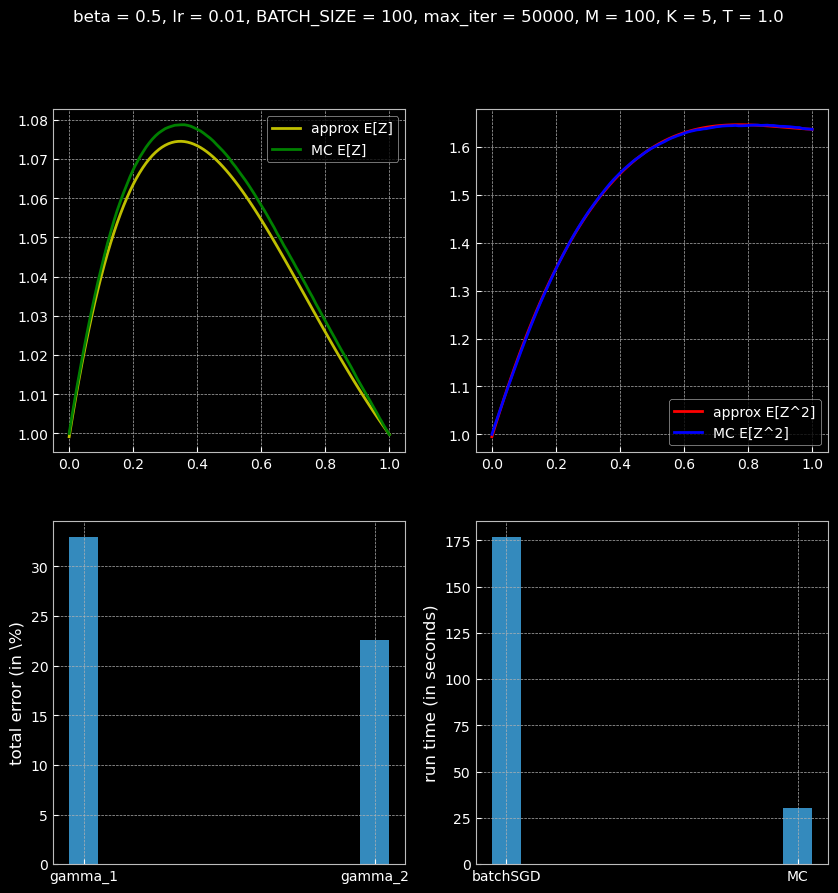

In [11]:
gamma_approx = numpy.zeros((2, tgrid_values))
for i in range(tgrid_values):
    gamma_approx[0, i] =  numpy.dot(gamma_batchSGD[0], tspace_fact[i]) 
    gamma_approx[1, i] =  numpy.dot(gamma_batchSGD[1], tspace_fact[i])
    
tot_err_gamma1 = (numpy.sum(numpy.abs(gamma_approx[0] - gamma_MC[0]))) * numpy.abs(numpy.mean(gamma_MC[0])) * 100
tot_err_gamma2 = (numpy.sum(numpy.abs(gamma_approx[1] - gamma_MC[1]))) * numpy.abs(numpy.mean(gamma_MC[1])) * 100
# plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2)

x_err_bar = numpy.array(['gamma_1','gamma_2'])
y_err_bar = numpy.array([tot_err_gamma1,tot_err_gamma2])

x_runtime_bar = numpy.array(['batchSGD','MC'])
y_runtime_bar = numpy.array([batchSGD_run_time,MC_run_time])

ax1.plot(tspace, gamma_approx[0], 'y', label='approx E[Z]')
ax1.plot(tspace, gamma_MC[0], 'g', label='MC E[Z]')
ax2.plot(tspace, gamma_approx[1], 'r', label='approx E[Z^2]')
ax2.plot(tspace, gamma_MC[1], 'b', label='MC E[Z^2]')
ax1.legend()
ax2.legend()

ax3.bar(x_err_bar, y_err_bar, width=0.1, bottom=None, align='center')
ax3.set_ylabel('total error (in \%)')
ax4.bar(x_runtime_bar, y_runtime_bar, width=0.1, bottom=None, align='center')
ax4.set_ylabel('run time (in seconds)')
# plt.rc('text', usetex=False)
title_str = 'beta = ' + str(beta) + ', lr = ' + str(lr) + ', BATCH_SIZE = ' + str(BATCH_SIZE) + ', max_iter = ' + str(max_iter) + ', M = ' + str(M) + ', K = ' + str(K) + ', T = ' + str(T)
fig.suptitle(title_str)

In [ ]:
# gamma = x0 * numpy.ones((2,K))
# Z = MKVSDEpolybatch_approx(tgrid_values, K, BATCH_SIZE)
# dW = numpy.random.randn(2, 2, BATCH_SIZE, tgrid_values-1)
# Z.generatebatch(x0, gamma, beta, tgrid_values, K, BATCH_SIZE, tspace, dW[0])